In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

#### Polynomial Regression 이해

polynomialFearures 클래스로 다항식 변환

In [4]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2x2 행렬 생성

X= np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X)

#degree=2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 반환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수feature:\n',poly_ftr)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [8]:
def polynomial_func(X):
    y = 1+ 2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
#     print(X[:,0])
#     print(X[:,1])
    return y

X = np.arange(0,4).reshape(2,2)

print('일차 단항식 계수 feature:\n',X,'\n')
y = polynomial_func(X)
print('삼차 다항식 결정값: \n',y)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]] 

삼차 다항식 결정값: 
 [  5 125]


3차 다항식 계수의 피처값과 3차 다항식 결정값으로 학습

In [9]:
#3차 다항식 변환
from sklearn.linear_model import LinearRegression
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature:\n',poly_ftr)

#Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polinomial 회귀 계수\n',np.round(model.coef_,2))
print('Polinomial 회귀 shape\n',np.round(model.coef_.shape,2))


3차 다항식 계수 feature:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polinomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polinomial 회귀 shape
 [10]


#### 사이킷런 파이프라인을 이용하여 3차 다항회귀 학습

사이킷런의 pipeline객체는 feature엔지니어링 변환과 모델학습/예측을 순차적으로 결합해줍니다.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from skleanr.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1+2*X[:,0]+3*x[:,0]**2 +4*x[:,1]**3
    return y

#

### Regularized Linear Model 

1. Lasso (Least Absolute Shrinkage and Selection Operator) Regression: 피쳐 수 줄일 때

Lasso 회귀는 선형 회귀의 한 형태로, 특징 선택과 정규화를 함께 수행하여 최종 모델의 예측 성능을 향상시킵니다. Lasso는 목적 함수에 L1 패널티를 추가하여 일부 특징의 계수를 완전히 0으로 만듭니다. 이렇게 하면 덜 중요한 특징이 모델에서 제외되므로 특징 선택이 이루어집니다. 이 점은 고차원 데이터에서 유용합니다.

2. Ridge Regression: 회귀계수 많을 때

Ridge 회귀도 선형 회귀의 한 형태로, L2 정규화를 사용합니다. L2 패널티는 모든 계수의 제곱을 합한 값을 목적 함수에 더하는 것을 의미합니다. 이로 인해 계수가 0이 되지는 않지만, 모델의 복잡성을 줄이고 다중공선성 문제를 완화하여 모델의 일반화 성능을 향상시킵니다.

다중공선성 : 유사한 성격의 feature가 같이 있음으로서 발생하는 부작용.

3. Elastic Net Regression:

Elastic Net 회귀는 Lasso와 Ridge 회귀의 조합입니다. L1과 L2 패널티를 모두 사용하여 특징 선택의 이점과 복잡성 제어를 동시에 수행합니다. Elastic Net은 Lasso와 Ridge의 특징을 모두 가지므로, 적은 수의 특징이 관련성이 높을 때(Lasso)와 많은 수의 특징이 관련성이 높을 때(Ridge) 모두 좋은 성능을 보입니다.

이 세 가지 회귀 방법 모두 머신러닝 모델이 훈련 데이터에 과적합되는 것을 방지하는 데 도움이 됩니다. 이는 모델이 새로운, 이전에 보지 못한 데이터에 대해 더 잘 일반화하도록 돕습니다. 이들 방법은 사이킷런의 linear_model 모듈에 Lasso, Ridge, ElasticNet 클래스로 구현되어 있습니다.

라쏘 회귀는 L1 규제를 사용하여 특성 선택(feature selection)의 효과를 가지기 때문에, 종속 변수와 관련이 적은 불필요한 특성들의 가중치를 0으로 만들 수 있습니다. 따라서, 라쏘 회귀는 피처 수를 줄이고 모델을 해석하기 쉽게 만드는 데에 적합합니다. 예를 들어, 많은 특성이 있는 데이터셋에서 중요한 특성들을 선택하고자 할 때 라쏘 회귀를 사용할 수 있습니다.

반면, 릿지 회귀는 L2 규제를 사용하여 모델의 복잡도를 제어합니다. L2 규제는 가중치들을 감소시키는 효과를 가지므로, 회귀 계수가 많은 경우에 유용합니다. 릿지 회귀는 모든 특성들의 가중치를 동시에 축소시키지만, 0으로 만들진 않습니다. 따라서, 특성들이 모델에 기여하는 정도를 감소시키면서도 중요한 특성들을 유지할 수 있습니다. 릿지 회귀는 다중공선성(multicollinearity) 문제가 있는 데이터셋에서 특히 효과적입니다.

In [19]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

bostonDF['PRICE'] = boston.target

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 neg mse scores:',np.round(neg_mse_scores,3))
print('5 folds의 개별 rmse scores:',np.round(rmse_scores,3))
print('5 folds의 평균 rmse :{0:.3f}'.format(avg_rmse))

5 folds의 개별 neg mse scores: [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 rmse scores: [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 평균 rmse :5.518


#### alpha 값을 0,0.1,1,10,100 으로 변경하면서 rmse 측정

In [21]:
ra = [0, 0.1, 1, 10, 100]

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

def cal_rmse(ra, X_data, y_target):
    li = []
    for i in ra:
        ridge = Ridge(alpha=i)
        neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
        rmse_scores = np.sqrt(-1 * neg_mse_scores)
        avg_rmse = np.mean(rmse_scores)
        
        print('alpha:',i)
        print('5 folds의 개별 neg mse scores:',np.round(neg_mse_scores,3))
        print('5 folds의 개별 rmse scores:',np.round(rmse_scores,3))
        print('5 folds의 평균 rmse :{0:.3f}'.format(avg_rmse),'\n')
        
cal_rmse(ra, X_data, y_target)

alpha: 0
5 folds의 개별 neg mse scores: [-12.46  -26.049 -33.074 -80.762 -33.314]
5 folds의 개별 rmse scores: [3.53  5.104 5.751 8.987 5.772]
5 folds의 평균 rmse :5.829 

alpha: 0.1
5 folds의 개별 neg mse scores: [-12.32  -25.198 -32.435 -80.703 -32.88 ]
5 folds의 개별 rmse scores: [3.51  5.02  5.695 8.983 5.734]
5 folds의 평균 rmse :5.788 

alpha: 1
5 folds의 개별 neg mse scores: [-11.711 -23.583 -29.693 -80.23  -31.116]
5 folds의 개별 rmse scores: [3.422 4.856 5.449 8.957 5.578]
5 folds의 평균 rmse :5.653 

alpha: 10
5 folds의 개별 neg mse scores: [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 rmse scores: [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 평균 rmse :5.518 

alpha: 100
5 folds의 개별 neg mse scores: [-12.825 -27.279 -34.68  -52.694 -22.051]
5 folds의 개별 rmse scores: [3.581 5.223 5.889 7.259 4.696]
5 folds의 평균 rmse :5.330 



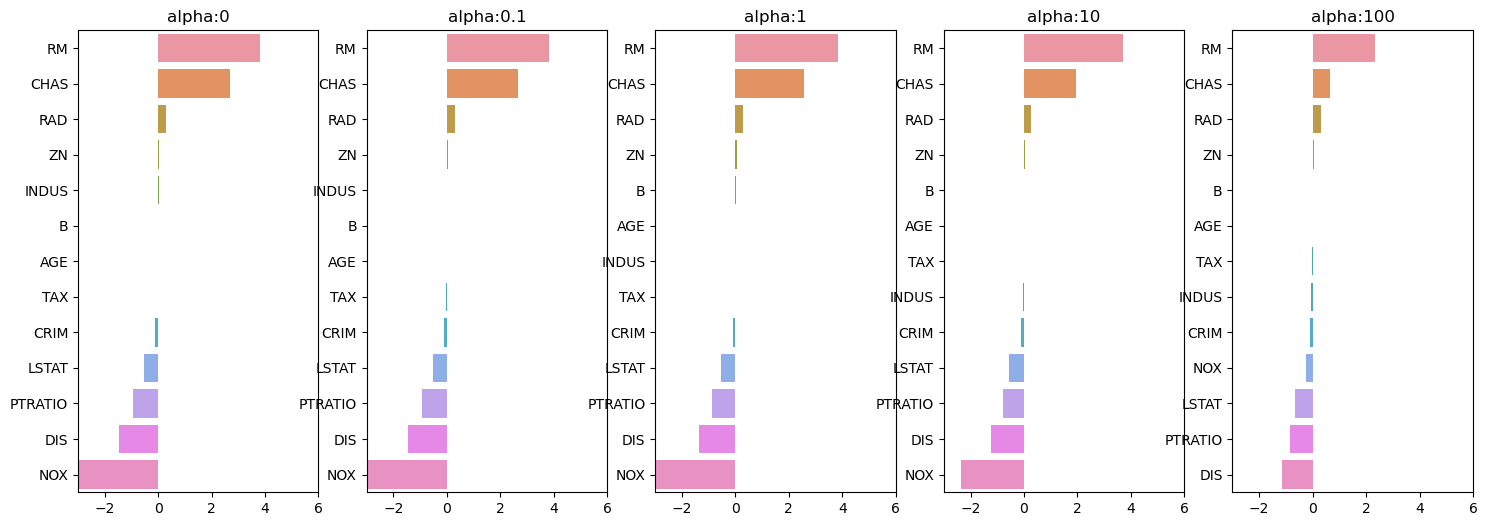

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,axs = plt.subplots (figsize=(18,6), nrows=1,ncols=5)
coeff_df = pd.DataFrame()

for pos,alpha in enumerate(ra):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data,y_target)
    coeff = pd.Series(data=ridge.coef_,index=X_data.columns)
    colname = 'alpha:'+str(alpha)
    coeff_df['colname']=coeff
    
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    
plt.show()

In [43]:

sort_column = 'alpha:'+str(ra[0])
coeff_df.sort_values(by=sort_column, ascending=False)


KeyError: 'alpha:0'

In [38]:
from sklearn.linear_model import Lasso, ElasticNet

def get_linear_reg_eval(model_name=None, params=None, X_data_n=None, y_target_n=None, verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('######', model_name,'######')
        
    for param in params:
        if model_name =='Ridge':model =Ridge(alpha=param)
        elif model_name =='Lasso':model =Lasso(alpha=param)
        elif model_name =='ElasticNet':model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error',cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores)) 
        print('alpha {0}일 때 5 fold 세트 평균 rmse: {1:.3f}'.format(param, avg_rmse))
        
        model.fit(X_data_n,y_target_n)
        if return_coeff:
            coeff = pd.Series(data=model.coef_,index=X_data_n.columns)
            colname = 'alpha:'+str(param)
            coeff_df[colname]=coeff
    return coeff_df

In [39]:
lasso_als = [0.07,0.1,0.5,1,3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_als, X_data_n=X_data, y_target_n=y_target)

###### Lasso ######
alpha 0.07일 때 5 fold 세트 평균 rmse: 5.612
alpha 0.1일 때 5 fold 세트 평균 rmse: 5.615
alpha 0.5일 때 5 fold 세트 평균 rmse: 5.669
alpha 1일 때 5 fold 세트 평균 rmse: 5.776
alpha 3일 때 5 fold 세트 평균 rmse: 6.189


In [40]:
sort_col = 'alpha:'+str(lasso_als[0])
coeff_lasso_df.sort_values(by=sort_col,ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


In [45]:
ela_als = [0.07,0.1,0.5,1,3]
coeff_ela_df = get_linear_reg_eval('ElasticNet', params=ela_als, X_data_n=X_data, y_target_n=y_target)
#

###### ElasticNet ######
alpha 0.07일 때 5 fold 세트 평균 rmse: 5.542
alpha 0.1일 때 5 fold 세트 평균 rmse: 5.526
alpha 0.5일 때 5 fold 세트 평균 rmse: 5.467
alpha 1일 때 5 fold 세트 평균 rmse: 5.597
alpha 3일 때 5 fold 세트 평균 rmse: 6.068


In [50]:
# 반환된 coeff_~_df를 첫번째 컬럼 순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_col = 'alpha:'+str(ela_als[0])
coeff_ela_df.sort_values(by=sort_col,ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


In [54]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

def get_scaled_data(method=None, p_degree=None, input_data=None):
    if method=='Standard':
        scaled_data=StandardScaler().fit_transform(input_data)
    elif method=='MinMax':
        scaled_data=MinMaxScaler().fit_transform(input_data)
    elif method=='Log':
        scaled_data=np.log1p(input_data)
    else:
        scaled_data=input_data
        
    if p_degree != None:
        scaled_data=PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)
    return scaled_data

In [59]:
alphas = [0.1,1,10,100]

scale_methods=[(None,None),('Standard',None),('Standard',2),('MinMax',None),('MinMax',2),('Log',None)]

for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], input_data=X_data)
    print('\n## 변환유형:{0}, Polynomial Degree:{1}'.format(scale_method[0],scale_method[1]))
    get_linear_reg_eval('Ridge',params=alphas, X_data_n = X_data_scaled, y_target_n= y_target, verbose=False, return_coeff=False)


## 변환유형:None, Polynomial Degree:None
alpha 0.1일 때 5 fold 세트 평균 rmse: 5.788
alpha 1일 때 5 fold 세트 평균 rmse: 5.653
alpha 10일 때 5 fold 세트 평균 rmse: 5.518
alpha 100일 때 5 fold 세트 평균 rmse: 5.330

## 변환유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 fold 세트 평균 rmse: 5.826
alpha 1일 때 5 fold 세트 평균 rmse: 5.803
alpha 10일 때 5 fold 세트 평균 rmse: 5.637
alpha 100일 때 5 fold 세트 평균 rmse: 5.421

## 변환유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 fold 세트 평균 rmse: 8.827
alpha 1일 때 5 fold 세트 평균 rmse: 6.871
alpha 10일 때 5 fold 세트 평균 rmse: 5.485
alpha 100일 때 5 fold 세트 평균 rmse: 4.634

## 변환유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 fold 세트 평균 rmse: 5.764
alpha 1일 때 5 fold 세트 평균 rmse: 5.465
alpha 10일 때 5 fold 세트 평균 rmse: 5.754
alpha 100일 때 5 fold 세트 평균 rmse: 7.635

## 변환유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 fold 세트 평균 rmse: 5.298
alpha 1일 때 5 fold 세트 평균 rmse: 4.323
alpha 10일 때 5 fold 세트 평균 rmse: 5.185
alpha 100일 때 5 fold 세트 평균 rmse: 6.538

## 변환유형:Log, Polynomial Degree:None
alpha 0.1일 때 5 fold 세트

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train,X_test,y_train,y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [72]:
from sklearn.metrics import accuracy_score, roc_auc_score

lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
lr_preds = lr_clf.predict(X_test)

print('accuracy:{0:.3f}, roc_auc:{1:.3f}'.format(accuracy_score(y_test,lr_preds), roc_auc_score(y_test,lr_preds)))

accuracy:0.977, roc_auc:0.972


In [76]:
solvers = ['lbfgs','liblinear', 'newton-cg','sag','saga']
for solver in solvers:
    lr_clf = LogisticRegression(solver=solver, max_iter=600)
    lr_clf.fit(X_train,y_train)
    lr_preds = lr_clf.predict(X_test)
    
    print('solver:{0}, accuracy:{1:.3f}, roc_auc:{2:0.3f}'.
          format(solver,accuracy_score(y_test,lr_preds), roc_auc_score(y_test,lr_preds)))

solver:lbfgs, accuracy:0.977, roc_auc:0.972
solver:liblinear, accuracy:0.982, roc_auc:0.979
solver:newton-cg, accuracy:0.977, roc_auc:0.972
solver:sag, accuracy:0.982, roc_auc:0.979
solver:saga, accuracy:0.982, roc_auc:0.979


In [80]:
from sklearn.model_selection import GridSearchCV

params = {'solver':['liblinear','lbfgs'],
         'penalty':['l2','l1'],
         'C':[0.01,0.1,1,5,10]}

lr_clf = LogisticRegression()

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled,cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}, 최적 평균 정확도:0.979
